In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

#import warnings
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
df_propiedades = pd.read_csv('../data/train.csv')

In [3]:
df_propiedades.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [4]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [5]:
df_propiedades.isna().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [6]:
df_propiedades['tipodepropiedad'].unique()

array(['Apartamento', 'Casa en condominio', 'Casa', 'Terreno',
       'Terreno comercial', 'Local Comercial', 'Quinta Vacacional',
       'Oficina comercial', 'Edificio', 'Casa uso de suelo',
       'Local en centro comercial', 'Bodega comercial', 'Otros', 'Villa',
       'Duplex', 'Inmuebles productivos urbanos',
       'Departamento Compartido', 'Nave industrial', 'Rancho',
       'Terreno industrial', nan, 'Huerta', 'Lote', 'Hospedaje', 'Garage'],
      dtype=object)

## TOP 15 Ciudades con mayor cantidad de propiedades publicadas

In [23]:
top_15_publ_por_ciudad = df_propiedades.groupby(['ciudad']).agg({'id': 'count'})\
                        .reset_index().rename(columns={'id': '# props'}).sort_values('# props', ascending=False).head(15)

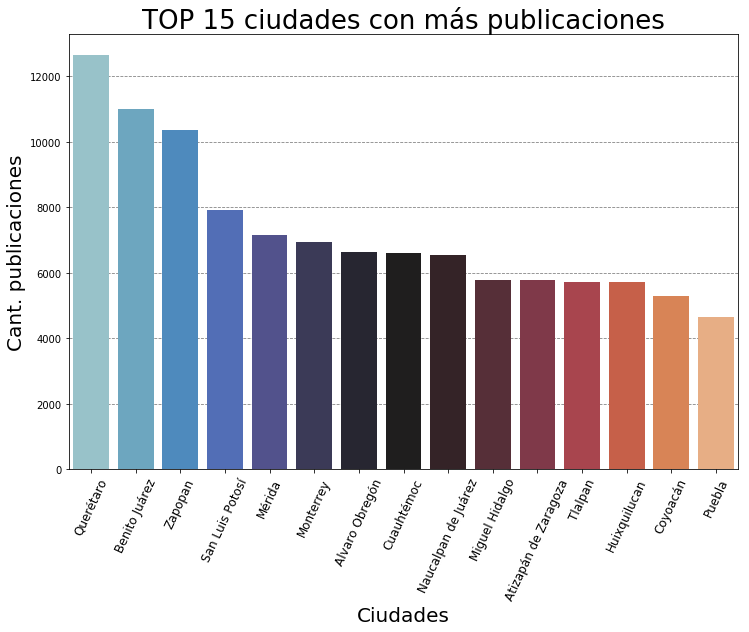

In [27]:
ax = sns.barplot(x=top_15_publ_por_ciudad['ciudad'], y=top_15_publ_por_ciudad['# props'], palette='icefire')
ax.set_xlabel('Ciudades', fontsize=20)
ax.set_ylabel('Cant. publicaciones', fontsize=20)
ax.tick_params(axis='x', labelrotation=65, labelsize=12)
ax.grid(linestyle='dashed', color='gray')
ax.xaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('TOP 15 ciudades con más publicaciones', fontsize=26);

## TOP 15 Provincias con mayor cantidad de propiedades publicadas

In [31]:
top_15_publ_por_prov = df_propiedades.groupby(['provincia']).agg({'id': 'count'})\
                        .reset_index().rename(columns={'id': '# props'}).sort_values('# props', ascending=False).head(15)

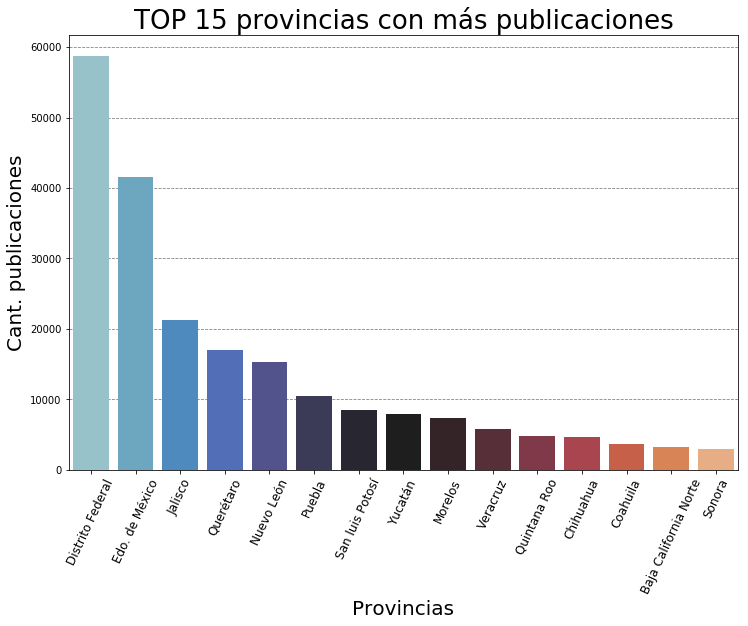

In [32]:
ax = sns.barplot(x=top_15_publ_por_prov['provincia'], y=top_15_publ_por_prov['# props'], palette='icefire')
ax.set_xlabel('Provincias', fontsize=20)
ax.set_ylabel('Cant. publicaciones', fontsize=20)
ax.tick_params(axis='x', labelrotation=65, labelsize=12)
ax.grid(linestyle='dashed', color='gray')
ax.xaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('TOP 15 provincias con más publicaciones', fontsize=26);